In [28]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [29]:
from shapely import wkt

In [168]:
pd.set_option('display.max_columns', None)

In [170]:
sc = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\3.datos\\1. distribution_infraestructura\\2. SC Instituciones\\Facility_Directory.csv')


In [152]:
values_gdf1 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\1.Mapas\\df_valores_rutas.csv')
risk2023 = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\1.Mapas\\areas\\municipiosrisk1.shp')


In [153]:
values_gdf1.head(1)

,nommun,estado,region,id_poligon,codigo_uni,eventos,inm_30km,inm_in_gri,inm_in_est,eventos_ed,eventos_gr,sc_30km,promedio_s,sc_estado,geometry,distancia_metros,distancia_km,max_vul2r1_normalized,max_vul2r2_normalized,max_vul2r3_normalized,max_vul2r4_normalized,inm_30km_adjusted,log_eventos_per_inm_30km,norm_log_eventos_per_inm_30km,latitud
0,"Coyoacan, Ciudad de Mexico",Ciudad de Mexico,Centro,PG1146,C-PG1146-8,1,1,1,0,8915,14894,134,91.230769,NaN,POINT (-99.1623599 19.349885),986724.0,986.724,NaN,NaN,NaN,NaN,2,0.405465,0.010628,19.349885


In [154]:
risk2023.head(1)

,nommun,cvemun,nomedo,area,R1,R2,R3,R4,region,RiesTotal,geometry
0,"Aguascalientes, Aguascalientes",1001,Aguascalientes,1168.762384,0.360084,0.372695,0.117251,0.662296,Centro,0.267699,"POLYGON ((-11370403.590 2520317.662, -11368883..."


In [155]:
# Realiza un merge entre values_gdf1 y risk2023 utilizando la columna 'nommun' como clave
values_gdf1 = values_gdf1.merge(risk2023[['nommun', 'RiesTotal']], on='nommun', how='left')



In [176]:
values_gdf = values_gdf1[['id_poligon', 'RiesTotal']]

In [177]:
import numpy as np
import pandas as pd

# Función para llenar NaN con 0 y luego los 0 con el promedio de las filas superior e inferior
def fill_zeros_with_mean(df, column):
    # Llenar los valores NaN con 0
    df[column].fillna(0, inplace=True)
    
    # Llenar los valores 0 con el promedio de las filas adyacentes
    for i in range(1, len(df) - 1):  # Empezar desde la segunda fila y terminar en la penúltima
        if df.loc[i, column] == 0:  # Si el valor es 0
            df.loc[i, column] = (df.loc[i - 1, column] + df.loc[i + 1, column]) / 2
    
    # Reemplazar cualquier valor 0 restante con el valor más bajo que no sea 0
    min_value = df[df[column] > 0][column].min()  # Encontrar el mínimo valor que no sea 0
    df[column].replace(0, min_value, inplace=True)  # Reemplazar valores 0 con el mínimo valor
    
    return df

# Aplicar la función a la columna 'RiesTotal'
values_gdf = fill_zeros_with_mean(values_gdf, 'RiesTotal')

# Verificar el resultado
print(values_gdf)



    id_poligon  RiesTotal
0       PG1146   0.111582
1       PG1147   0.072858
2       PG1297   0.050554
3       PG1145   0.049482
4       PG1530   0.049215
..         ...        ...
393     PG1378   0.120483
394     PG1572   0.131392
395     PG1530   0.145552
396     PG1495   0.337160
397     PG1456   0.066991

[398 rows x 2 columns]


C:\Users\puria\AppData\Local\Temp\ipykernel_3024\1129771965.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)
C:\Users\puria\AppData\Local\Temp\ipykernel_3024\1129771965.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(0, inplace=True)
C:\Users\puria\AppData\Local\Temp\ipykernel_3024\11

In [179]:
# Convertir la columna RiesTotal a tipo numérico, forzando errores a NaN
values_gdf['RiesTotal'] = pd.to_numeric(values_gdf['RiesTotal'], errors='coerce')


C:\Users\puria\AppData\Local\Temp\ipykernel_3024\1852111112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_gdf['RiesTotal'] = pd.to_numeric(values_gdf['RiesTotal'], errors='coerce')


In [160]:
# Verificar si hay algún valor NaN en el dataframe values_gdf
nan_exists = values_gdf.isna().any().any()

# Mostrar el resultado
if nan_exists:
    print("Hay valores NaN en el dataframe.")
else:
    print("No hay valores NaN en el dataframe.")


No hay valores NaN en el dataframe.


In [161]:
import pandas as pd

# Agrupar por 'id_poligon' y obtener la fila con el valor más alto de 'RiesTotal' para cada grupo
values_gdf_sin_duplicados = values_gdf.groupby('id_poligon', as_index=False).max()

# Mostrar el nuevo dataframe sin duplicados
print(values_gdf_sin_duplicados)


    id_poligon  RiesTotal
0       PG1027   0.059202
1       PG1029   0.072418
2       PG1030   0.034100
3       PG1031   0.378087
4       PG1032   0.067704
..         ...        ...
155      PG988   0.043337
156      PG989   0.017074
157      PG990   0.017050
158      PG994   0.078495
159      PG995   0.071259

[160 rows x 2 columns]


In [128]:
# Verificar los tipos de datos en values_gdf
print(values_gdf.dtypes)


id_poligon     object
RiesTotal     float64
dtype: object


In [182]:
# Crear el diccionario usando los valores máximos
ries_total_dict = dict(zip(values_gdf_sin_duplicados['id_poligon'], values_gdf_sin_duplicados['RiesTotal']))




In [165]:
ries_total_dict

{'PG1027': 0.059202464189088,
 'PG1029': 0.0724181180697575,
 'PG1030': 0.034099877358029,
 'PG1031': 0.3780868657781,
 'PG1032': 0.067704112162274,
 'PG1040': 0.0810061512293275,
 'PG1069': 0.095340525505622,
 'PG1070': 0.12391749257864,
 'PG1071': 0.075225469801871,
 'PG1072': 0.269785914511758,
 'PG1074': 0.070686116733598,
 'PG1077': 0.119731066776848,
 'PG1081': 0.114711653865071,
 'PG1082': 0.062401320148873,
 'PG1103': 0.096557264186132,
 'PG1108': 0.098512832019731,
 'PG1109': 0.21809848168231,
 'PG1113': 0.072391515411357,
 'PG1114': 0.084353700505279,
 'PG1115': 0.100829622094095,
 'PG1116': 0.349963728397085,
 'PG1117': 0.102292552431563,
 'PG1118': 0.087282158945198,
 'PG1120': 0.07104966627725351,
 'PG1142': 0.050370466838269,
 'PG1143': 0.075187583032447,
 'PG1145': 0.074955442398822,
 'PG1146': 0.354452081543805,
 'PG1147': 0.08531322851546749,
 'PG1150': 0.049432058025498,
 'PG1152': 0.134962904028908,
 'PG1153': 0.09973177083255,
 'PG1154': 0.091402123553406,
 'PG1155'

In [181]:
values_gdf

,id_poligon,RiesTotal
0,PG1146,0.111582
1,PG1147,0.072858
2,PG1297,0.050554
3,PG1145,0.049482
4,PG1530,0.049215
...,...,...
393,PG1378,0.120483
394,PG1572,0.131392
395,PG1530,0.145552
396,PG1495,0.337160


In [183]:
# Paso 1: Agrupar values_gdf1 por 'id_poligon' y obtener la fila con el valor más alto de 'sc_30km'
values_gdf1_sin_duplicados = values_gdf1.groupby('id_poligon', as_index=False)['sc_30km'].max()

# Paso 2: Combinar ambos dataframes usando 'id_poligon' como clave
# Usamos 'left' join para mantener todos los datos de 'values_gdf'
values_gdf_actualizado = pd.merge(values_gdf, values_gdf1_sin_duplicados, on='id_poligon', how='left')

# Mostrar el dataframe actualizado
print(values_gdf_actualizado)


    id_poligon  RiesTotal  sc_30km
0       PG1146   0.111582      134
1       PG1147   0.072858        4
2       PG1297   0.050554        0
3       PG1145   0.049482        9
4       PG1530   0.049215       67
..         ...        ...      ...
393     PG1378   0.120483       25
394     PG1572   0.131392       34
395     PG1530   0.145552       67
396     PG1495   0.337160        7
397     PG1456   0.066991        0

[398 rows x 3 columns]


In [185]:
import pandas as pd

# Asegurarse de que ambas columnas 'RiesTotal' y 'sc_30km' son numéricas
values_gdf_actualizado['RiesTotal'] = pd.to_numeric(values_gdf_actualizado['RiesTotal'], errors='coerce')
values_gdf_actualizado['sc_30km'] = pd.to_numeric(values_gdf_actualizado['sc_30km'], errors='coerce')

# Manejar la división, si 'sc_30km' es 0 o NaN, usar 'RiesTotal', de lo contrario dividir
values_gdf_actualizado['riesajus'] = values_gdf_actualizado.apply(
    lambda row: row['RiesTotal'] if row['sc_30km'] == 0 or pd.isna(row['sc_30km']) else row['RiesTotal'] / row['sc_30km'],
    axis=1
)

# Mostrar el resultado
print(values_gdf_actualizado[['RiesTotal', 'sc_30km', 'riesajus']])


     RiesTotal  sc_30km  riesajus
0     0.111582      134  0.000833
1     0.072858        4  0.018214
2     0.050554        0  0.050554
3     0.049482        9  0.005498
4     0.049215       67  0.000735
..         ...      ...       ...
393   0.120483       25  0.004819
394   0.131392       34  0.003864
395   0.145552       67  0.002172
396   0.337160        7  0.048166
397   0.066991        0  0.066991

[398 rows x 3 columns]


In [191]:
values_gdf_actualizado

,id_poligon,RiesTotal,sc_30km,riesajus
0,PG1146,0.111582,134,0.000833
1,PG1147,0.072858,4,0.018214
2,PG1297,0.050554,0,0.050554
3,PG1145,0.049482,9,0.005498
4,PG1530,0.049215,67,0.000735
...,...,...,...,...
393,PG1378,0.120483,25,0.004819
394,PG1572,0.131392,34,0.003864
395,PG1530,0.145552,67,0.002172
396,PG1495,0.337160,7,0.048166


In [192]:
import pandas as pd

# Paso 1: Agrupar por 'id_poligon' y obtener el valor más alto de 'riesajus'
values_gdf_max = values_gdf_actualizado.groupby('id_poligon', as_index=False).max()

# Paso 2: Crear un diccionario con el valor más alto de 'riesajus' para cada 'id_poligon'
riesajus_dict = dict(zip(values_gdf_max['id_poligon'], values_gdf_max['riesajus']))

# Paso 3: Función para sumar los valores de 'riesajus' para cada secuencia de polígonos
def sumar_riesajus(secuencia):
    # Dividir la secuencia en una lista de polígonos
    ids_poligonos = secuencia.split(', ')
    # Sumar los valores de 'riesajus' para cada polígono usando el diccionario
    suma_riesajus = sum(riesajus_dict.get(id_poligon, 0) for id_poligon in ids_poligonos)
    return suma_riesajus

# Paso 4: Aplicar la función a la columna 'filtered_secuencias' para obtener la suma de 'riesajus'
secfinal['suma_riesajus'] = secfinal['filtered_secuencias'].apply(sumar_riesajus)

# Mostrar el dataframe actualizado
print(secfinal[['filtered_secuencias', 'suma_riesajus']])


                                    filtered_secuencias  suma_riesajus
0     PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...       2.098932
1     PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...       2.087133
2     PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...       2.118827
3     PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...       2.097473
4     PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...       2.085674
...                                                 ...            ...
5349  PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...       1.218809
5350  PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...       1.100388
5351  PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...       1.114666
5352  PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...       1.223356
5353  PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...       1.237635

[5354 rows x 2 columns]


In [ ]:
# Función para calcular la suma de RiesTotal dado un string con secuencias
def calcular_riesgo_total(secuencia):
    # Dividimos la secuencia en una lista de ID de polígonos
    ids_poligonos = secuencia.split(', ')
    # Sumamos los valores de RiesTotal para cada id_poligon, si existe en el diccionario
    suma_riesgo = sum(ries_total_dict.get(id_poligon, 0) for id_poligon in ids_poligonos)
    return suma_riesgo

# Aplicar la función a la columna 'filtered_secuencias' y crear una nueva columna con la suma del RiesgoTotal
secfinal['suma_RiesTotal'] = secfinal['filtered_secuencias'].apply(calcular_riesgo_total)

# Mostrar el dataframe resultante
secfinal.head()

## secuencias final

In [190]:
secfinal = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\1.Mapas\\procesamiento de rutas\\Secuencias_Final.csv')

In [195]:
#secfinal.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\1.Mapas\\procesamiento de rutas\\Secuencias_Final.csv')

In [194]:
secfinal

,Unnamed: 0,filtered_secuencias,last_five_id,arc_sequences,start_id,end_id,region,suma_arcos,suma_dist,suma_RiesTotal,suma_riesajus
0,0,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG499, PG460, PG383, PG268, PG190","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG190,Pacifico,166373.0,5339.00000,4.000914,2.098932
1,1,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG497, PG499, PG460, PG383, PG268","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG268,Pacifico,149837.0,5162.00000,3.446333,2.087133
2,2,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG497, PG499, PG460, PG383, PG307","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG307,Pacifico,147037.0,5120.00000,3.204103,2.118827
3,3,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG499, PG460, PG422, PG268, PG190","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG190,Pacifico,167804.0,5348.00000,3.999455,2.097473
4,4,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG497, PG499, PG460, PG422, PG268","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG268,Pacifico,151268.0,5171.00000,3.444874,2.085674
...,...,...,...,...,...,...,...,...,...,...,...
5349,5349,"PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...","PG1192, PG1193, PG1232, PG1233, PG1272","PG1810-PG1772, PG1772-PG1694, PG1694-PG1654, P...",PG1810,PG1272,Golfo,128599.5,2745.30436,2.837039,1.218809
5350,5350,"PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...","PG1229, PG1192, PG1193, PG1232, PG1233","PG1810-PG1772, PG1772-PG1694, PG1694-PG1654, P...",PG1810,PG1233,Golfo,133057.0,2849.60000,3.123122,1.100388
5351,5351,"PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...","PG1192, PG1193, PG1232, PG1233, PG1272","PG1810-PG1772, PG1772-PG1694, PG1694-PG1654, P...",PG1810,PG1272,Golfo,136413.5,2936.50436,3.237353,1.114666
5352,5352,"PG1810, PG1772, PG1694, PG1654, PG1614, PG1574...","PG1229, PG1192, PG1193, PG1232, PG1233","PG1810-PG1772, PG1772-PG1694, PG1694-PG1654, P...",PG1810,PG1233,Golfo,137767.0,2593.40000,2.452639,1.223356


In [205]:

secfinal_sin_nan = secfinal.dropna(subset=['suma_arcos'])



In [206]:
# Paso 1: Crear una función para seleccionar el mayor, mediano y menor valor de 'suma_arcos' por 'region'
def seleccionar_filas_importantes(grupo):
    # Ordenar por 'suma_arcos'
    grupo_ordenado = grupo.sort_values(by='suma_arcos', ascending=True)
    
    # Seleccionar el menor, mediano, y mayor
    menor = grupo_ordenado.iloc[0]  # El primero
    mediano = grupo_ordenado.iloc[len(grupo_ordenado) // 2]  # Mediano
    mayor = grupo_ordenado.iloc[-1]  # El último
    
    # Devolver las tres filas seleccionadas
    return pd.DataFrame([menor, mediano, mayor])

# Paso 2: Aplicar la función a cada grupo de 'region'
subdataframe = secfinal_sin_nan.groupby('region').apply(seleccionar_filas_importantes).reset_index(drop=True)


#ponerles direcciones

C:\Users\puria\AppData\Local\Temp\ipykernel_3024\681479416.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subdataframe = secfinal_sin_nan.groupby('region').apply(seleccionar_filas_importantes).reset_index(drop=True)


In [207]:
subdataframe

,Unnamed: 0,filtered_secuencias,last_five_id,arc_sequences,start_id,end_id,region,suma_arcos,suma_dist,suma_RiesTotal,suma_riesajus
0,1017,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...","PG995, PG956, PG921, PG769, PG887","PG1572-PG1533, PG1533-PG1494, PG1494-PG1417, P...",PG1572,PG887,Centro,91069.5,3067.000000,3.076934,0.666555
1,1431,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...","PG956, PG841, PG921, PG1040, PG1081","PG1572-PG1533, PG1533-PG1494, PG1494-PG1417, P...",PG1572,PG1081,Centro,101528.0,3111.000000,3.180924,0.800179
2,1064,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...","PG1074, PG1077, PG1040, PG1081, PG1082","PG1572-PG1533, PG1533-PG1494, PG1494-PG1417, P...",PG1572,PG1082,Centro,121243.0,2817.379304,3.165259,0.721737
3,3878,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...","PG1192, PG1193, PG1194, PG1155, PG1156","PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...",PG1531,PG1156,Golfo,23863.5,2467.000000,2.231401,1.367314
4,2174,"PG1690, PG1613, PG1574, PG1456, PG1417, PG1378...","PG1115, PG1116, PG1117, PG1118, PG1157","PG1690-PG1613, PG1613-PG1574, PG1574-PG1456, P...",PG1690,PG1157,Golfo,152221.0,2757.300000,2.856475,1.127001
5,3184,"PG1572, PG1573, PG1534, PG1456, PG1417, PG1378...","PG1154, PG1115, PG1116, PG1155, PG1233","PG1572-PG1573, PG1573-PG1534, PG1534-PG1456, P...",PG1572,PG1233,Golfo,208605.5,2615.100000,3.260133,1.138813
6,442,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...","PG534, PG497, PG499, PG538, PG578","PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...",PG1531,PG578,Pacifico,43264.0,4676.500000,2.964168,1.824263
7,228,"PG1530, PG1491, PG1492, PG1453, PG1414, PG1415...","PG499, PG460, PG422, PG268, PG190","PG1530-PG1491, PG1491-PG1492, PG1492-PG1453, P...",PG1530,PG190,Pacifico,121115.0,4917.500000,4.123288,1.915314
8,572,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG499, PG460, PG422, PG268, PG190","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG190,Pacifico,176759.0,5037.700000,4.594309,1.908340


In [212]:
import pandas as pd

# Función para etiquetar la columna 'Ruta'
def etiquetar_ruta(idx, row):
    if idx % 3 == 0:
        tipo = 'Más transitada'
    elif idx % 3 == 1:
        tipo = 'Mediana'
    else:
        tipo = 'Menos transitada'
    
    return f"{row['region']} - {tipo}"

# Crear la nueva columna 'Ruta' con las etiquetas basadas en la región y el tipo de tránsito
subdataframe['Ruta'] = subdataframe.apply(lambda row: etiquetar_ruta(subdataframe.index.get_loc(row.name), row), axis=1)

# Crear un nuevo dataframe con las columnas renombradas
tabla_resultante = subdataframe[['Ruta']].copy()
tabla_resultante['Total de Encuentros'] = subdataframe['suma_arcos']
tabla_resultante['Índice de Riesgo Total'] = subdataframe['suma_RiesTotal']
tabla_resultante['Índice de Riesgo Ajustado (SC)'] = subdataframe['suma_riesajus']

# Mostrar la tabla resultante
print(tabla_resultante)


                          Ruta  Total de Encuentros  Índice de Riesgo Total  \
0      Centro - Más transitada              91069.5                3.076934   
1             Centro - Mediana             101528.0                3.180924   
2    Centro - Menos transitada             121243.0                3.165259   
3       Golfo - Más transitada              23863.5                2.231401   
4              Golfo - Mediana             152221.0                2.856475   
5     Golfo - Menos transitada             208605.5                3.260133   
6    Pacifico - Más transitada              43264.0                2.964168   
7           Pacifico - Mediana             121115.0                4.123288   
8  Pacifico - Menos transitada             176759.0                4.594309   

   Índice de Riesgo Ajustado (SC)  
0                        0.666555  
1                        0.800179  
2                        0.721737  
3                        1.367314  
4                        1.12

In [213]:
tabla_resultante

,Ruta,Total de Encuentros,Índice de Riesgo Total,Índice de Riesgo Ajustado (SC)
0,Centro - Más transitada,91069.5,3.076934,0.666555
1,Centro - Mediana,101528.0,3.180924,0.800179
2,Centro - Menos transitada,121243.0,3.165259,0.721737
3,Golfo - Más transitada,23863.5,2.231401,1.367314
4,Golfo - Mediana,152221.0,2.856475,1.127001
5,Golfo - Menos transitada,208605.5,3.260133,1.138813
6,Pacifico - Más transitada,43264.0,2.964168,1.824263
7,Pacifico - Mediana,121115.0,4.123288,1.915314
8,Pacifico - Menos transitada,176759.0,4.594309,1.908340


In [215]:
import statsmodels.api as sm

# Variables predictoras y dependientes
X = tabla_resultante[['Total de Encuentros', 'Índice de Riesgo Total']]
y = tabla_resultante['Índice de Riesgo Ajustado (SC)']

# Agregar una constante para la regresión
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Índice de Riesgo Ajustado (SC)   R-squared:                       0.391
Model:                                        OLS   Adj. R-squared:                  0.188
Method:                             Least Squares   F-statistic:                     1.927
Date:                            Fri, 18 Oct 2024   Prob (F-statistic):              0.226
Time:                                    05:10:02   Log-Likelihood:                -3.9103
No. Observations:                               9   AIC:                             13.82
Df Residuals:                                   6   BIC:                             14.41
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]

C:\Users\puria\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [218]:
correlaciones_spearman = tabla_resultante[['Total de Encuentros', 'Índice de Riesgo Total', 'Índice de Riesgo Ajustado (SC)']].corr(method='spearman')

In [217]:
correlaciones_spearman

,Total de Encuentros,Índice de Riesgo Total,Índice de Riesgo Ajustado (SC)
Total de Encuentros,1.000000,0.616667,0.066667
Índice de Riesgo Total,0.616667,1.000000,0.350000
Índice de Riesgo Ajustado (SC),0.066667,0.350000,1.000000


In [198]:
arcos = gpd.read_file('C:\\Users\\puria\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\1.Mapas\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.shp')

In [199]:
arcos

,Unnamed_ 0,Arc,ciudad_ori,ciudad_des,distance,duration,distance_k,duration_m,region,eventos_or,eventos_de,eventos_pr,geometry
0,0,PG1529-PG1530,"Suchiate, Chiapas","Tapachula, Chiapas",35.6 km,8 hours 8 mins,35.6,488,Sur,28203.0,70665.0,49434.0,"LINESTRING (-92.23982 14.63441, -92.23938 14.6..."
1,1,PG1530-PG1491,"Tapachula, Chiapas","Mapastepec, Chiapas",103 km,22 hours 57 mins,103.0,1377,Sur,70665.0,35.0,35350.0,"LINESTRING (-92.26123 14.90446, -92.26156 14.9..."
2,2,PG1491-PG1492,"Mapastepec, Chiapas","Pijijiapan, Chiapas",45.3 km,10 hours 8 mins,45.3,608,Sur,35.0,11296.0,5665.5,"LINESTRING (-92.89860 15.44007, -92.89826 15.4..."
3,3,PG1492-PG1453,"Pijijiapan, Chiapas","Arriaga, Chiapas",101 km,22 hours 36 mins,101.0,1356,Sur,11296.0,19741.0,15518.5,"LINESTRING (-93.20811 15.68506, -93.20779 15.6..."
4,4,PG1453-PG1414,"Arriaga, Chiapas","Chahuites, Oaxaca",36.4 km,8 hours 9 mins,36.4,489,Sur,19741.0,54.0,9897.5,"LINESTRING (-93.90072 16.23439, -93.90258 16.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,198,PG841-PG761,"Durango, Durango","Mazatlan, Sinaloa",353 km,3 days 8 hours,353.0,4800,Pacifico,574.0,976.0,775.0,"LINESTRING (-104.66368 24.03525, -104.68499 24..."
199,199,PG1072-PG1113,"San Luis Potosi, San Luis Potosi","Doctor Arroyo, Nuevo Leon",174 km,1 day 15 hours,174.0,2340,Golfo,4067.0,11.0,2039.0,"LINESTRING (-100.49957 22.49923, -100.50182 22..."
200,200,PG1695-PG1654,"Progreso, Yucatan","Campeche, Campeche",205 km,1 day 22 hours,205.0,2760,Sur,3.0,430.0,216.5,"LINESTRING (-89.66366 21.28217, -89.66291 21.2..."
201,201,PG1810-PG1772,"Tulum, Quintana Roo","Valladolid, Yucatan",106 km,23 hours 51 mins,106.0,1431,Sur,13.0,5.0,9.0,"LINESTRING (-87.44957 20.16921, -87.44989 20.1..."


In [208]:
import geopandas as gpd
import pandas as pd

# Función para crear un GeoDataFrame basado en los arcos de 'arc_sequences'
def crear_geodataframe(row, arcos_df):
    # Obtener la secuencia de arcos y dividirla en una lista
    arcos_secuencia = row['arc_sequences'].split(', ')
    
    # Filtrar el dataframe 'arcos' para obtener solo los arcos que coinciden con la secuencia
    arcos_filtrados = arcos_df[arcos_df['Arc'].isin(arcos_secuencia)]
    
    # Crear un GeoDataFrame con los geometries correspondientes
    gdf = gpd.GeoDataFrame(arcos_filtrados, geometry='geometry')
    
    return gdf

# Iterar sobre cada fila de secfinal
for idx, row in subdataframe.iterrows():
    # Identificar si es max, med o min basándose en el índice
    if idx % 3 == 0:
        tipo = 'max'
    elif idx % 3 == 1:
        tipo = 'med'
    else:
        tipo = 'min'
    
    # Crear el nombre del GeoDataFrame basado en la región y el tipo (max, med, min)
    nombre_gdf = f"{row['region']}_{tipo}"
    
    # Crear el GeoDataFrame correspondiente
    gdf = crear_geodataframe(row, arcos)
    
    # Asignar el GeoDataFrame a una variable con el nombre adecuado
    globals()[nombre_gdf] = gdf

    # Mostrar el GeoDataFrame creado
    print(f"GeoDataFrame para {nombre_gdf}:")
    print(gdf)


GeoDataFrame para Centro_max:
     Unnamed_ 0            Arc                                  ciudad_ori  \
72           72  PG1146-PG1108                Iztapalapa, Ciudad de Mexico   
79           79  PG1108-PG1070                 San Juan del Rio, Queretaro   
80           80  PG1070-PG1031                       Comonfort, Guanajuato   
81           81   PG1031-PG994                        Irapuato, Guanajuato   
82           82    PG994-PG995                       Cosio, Aguascalientes   
83           83    PG995-PG956                         Trancoso, Zacatecas   
86           86    PG921-PG769                      Gomez Palacio, Durango   
90           90    PG769-PG887                        Chihuahua, Chihuahua   
97           97    PG956-PG921                           Calera, Zacatecas   
104         104  PG1223-PG1224                              Puebla, Puebla   
105         105  PG1224-PG1185                          Xaloztoc, Tlaxcala   
106         106  PG1185-PG1146  Ix

In [209]:
Centro_max

,Unnamed_ 0,Arc,ciudad_ori,ciudad_des,distance,duration,distance_k,duration_m,region,eventos_or,eventos_de,eventos_pr,geometry
72,72,PG1146-PG1108,"Iztapalapa, Ciudad de Mexico","San Juan del Rio, Queretaro",181 km,1 day 18 hours,181.0,2520,Centro,6091.0,1303.0,3697.0,"LINESTRING (-99.09304 19.35877, -99.09524 19.3..."
79,79,PG1108-PG1070,"San Juan del Rio, Queretaro","Comonfort, Guanajuato",105 km,23 hours 46 mins,105.0,1426,Centro,1303.0,29.0,666.0,"LINESTRING (-99.99326 20.38681, -99.99397 20.3..."
80,80,PG1070-PG1031,"Comonfort, Guanajuato","Irapuato, Guanajuato",73.4 km,16 hours 35 mins,73.4,995,Centro,29.0,43.0,36.0,"LINESTRING (-100.76136 20.71986, -100.76121 20..."
81,81,PG1031-PG994,"Irapuato, Guanajuato","Cosio, Aguascalientes",247 km,2 days 8 hours,247.0,3360,Centro,43.0,98.0,70.5,"LINESTRING (-101.35195 20.67598, -101.35207 20..."
82,82,PG994-PG995,"Cosio, Aguascalientes","Trancoso, Zacatecas",51.9 km,11 hours 49 mins,51.9,709,Centro,98.0,99.0,98.5,"LINESTRING (-102.30907 22.37036, -102.30842 22..."
83,83,PG995-PG956,"Trancoso, Zacatecas","Calera, Zacatecas",69.5 km,15 hours 57 mins,69.5,957,Centro,99.0,42.0,70.5,"LINESTRING (-102.36663 22.73519, -102.36650 22..."
86,86,PG921-PG769,"Gomez Palacio, Durango","Chihuahua, Chihuahua",460 km,4 days 7 hours,460.0,6180,Centro,849.0,2040.0,1444.5,"LINESTRING (-103.49453 25.57285, -103.49835 25..."
90,90,PG769-PG887,"Chihuahua, Chihuahua","Ojinaga, Chihuahua",248 km,2 days 7 hours,248.0,3300,Centro,2040.0,101.0,1070.5,"LINESTRING (-106.00039 28.49850, -105.99447 28..."
97,97,PG956-PG921,"Calera, Zacatecas","Gomez Palacio, Durango",343 km,3 days 4 hours,343.0,4560,Centro,42.0,849.0,445.5,"LINESTRING (-102.86034 22.98340, -102.86023 22..."
104,104,PG1223-PG1224,"Puebla, Puebla","Xaloztoc, Tlaxcala",52.4 km,12 hours 15 mins,52.4,735,Centro,5069.0,2301.0,3685.0,"LINESTRING (-98.20695 19.03840, -98.20674 19.0..."


In [210]:
import os

# Ruta donde se guardarán los archivos shapefile
output_path = r'C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas'

# Lista con los nombres de los GeoDataFrames creados (ajustar según sea necesario)
geo_dataframe_names = ['Centro_max', 'Centro_med', 'Centro_min', 
                       'Golfo_max', 'Golfo_med', 'Golfo_min',
                       'Pacifico_max', 'Pacifico_med', 'Pacifico_min']

# Iterar sobre los nombres de los GeoDataFrames y guardarlos como shapefiles
for gdf_name in geo_dataframe_names:
    # Obtener el GeoDataFrame usando el nombre
    gdf = globals().get(gdf_name)
    
    if gdf is not None:
        # Crear el path completo para guardar el shapefile
        file_path = os.path.join(output_path, f'{gdf_name}.shp')
        
        # Guardar el GeoDataFrame en formato shapefile
        gdf.to_file(file_path)
        print(f"Guardado: {file_path}")
    else:
        print(f"{gdf_name} no existe.")


Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\Centro_max.shp
Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\Centro_med.shp
Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\Centro_min.shp
Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\Golfo_max.shp
Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\Golfo_med.shp
Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\Golfo_min.shp
Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\Pacifico_max.shp
Guardado: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.

In [211]:
import geopandas as gpd
import pandas as pd

# Lista con los nombres de los GeoDataFrames creados (ajustar según sea necesario)
geo_dataframe_names = ['Centro_max', 'Centro_med', 'Centro_min', 
                       'Golfo_max', 'Golfo_med', 'Golfo_min',
                       'Pacifico_max', 'Pacifico_med', 'Pacifico_min']

# Crear una lista para almacenar los GeoDataFrames con la etiqueta correspondiente
gdf_list = []

# Iterar sobre los nombres de los GeoDataFrames
for gdf_name in geo_dataframe_names:
    # Obtener el GeoDataFrame usando el nombre
    gdf = globals().get(gdf_name)
    
    if gdf is not None:
        # Añadir una nueva columna 'etiqueta' para identificar la secuencia en ArcGIS
        gdf['etiqueta'] = gdf_name
        
        # Añadir el GeoDataFrame a la lista
        gdf_list.append(gdf)

# Combinar todos los GeoDataFrames en uno solo
gdf_combined = pd.concat(gdf_list, ignore_index=True)

# Guardar el GeoDataFrame combinado en un archivo shapefile
output_path = r'C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\\rutas_combinadas.shp'
gdf_combined.to_file(output_path)

print(f"Shapefile combinado guardado en: {output_path}")


Shapefile combinado guardado en: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\Rutas Mapeadas\\rutas_combinadas.shp


### Figura rutas por 10 cudades principales de cada ano

In [5]:
df_mun = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\mun2020-2024.csv')

# Pivotar el DataFrame
df_pivot = df_mun.pivot_table(index="Municipio", columns="Año", values="Total", fill_value=0).reset_index()



In [5]:
# Extraer la parte después de la coma en cada valor de la columna 'Municipio'
df_pivot['Estado'] = df_pivot['Municipio'].str.split(',').str[1].str.strip()

# Obtener una lista única de los estados
estados_unicos = df_pivot['Estado'].unique()

# Mostrar la lista de valores únicos
print(estados_unicos)


['Chis.' 'Méx.' 'Gro.' 'Oax.' 'Ver.' 'Hgo.' 'Coah.' 'Son.' 'Ags.' 'Sin.'
 'Tamps.' 'NL' 'Mor.' 'Tlax.' 'Qro.' 'Gto.' 'Mich.' 'Jal.' 'Chih.'
 'Q. Roo' 'Nay.' 'Tab.' 'CDMX' 'Camp.' 'Zac.' 'SLP' 'Yuc.' 'Col.' 'Dgo.'
 'BC' 'Pue.' 'BCS' 'oaX.']


In [8]:
df_pivot

Año,Municipio,2020,2021,2022,2023,2024
0,"Acacoyagua, Chis.",0.0,0.0,0.0,2.0,0.0
1,"Acala, Chis.",0.0,0.0,0.0,0.0,1.0
2,"Acambay de Ruíz Castañeda, Méx.",0.0,0.0,0.0,1.0,0.0
3,"Acapetahua, Chis.",257.0,0.0,4572.0,6320.0,85.0
4,"Acapulco de Juárez, Gro.",17.0,122.0,36.0,32.0,0.0
...,...,...,...,...,...,...
648,"Zumpango, Méx.",0.0,8.0,0.0,155.0,947.0
649,"Álamo Temapache, Ver.",0.0,0.0,0.0,3.0,0.0
650,"Álvaro Obregón, Mich.",0.0,0.0,0.0,1.0,0.0
651,"Ángel Albino Corzo, Chis.",0.0,0.0,24.0,0.0,0.0


## cambio relativo


In [11]:
print(df_pivot.columns)


Index(['Municipio', 2020, 2021, 2022, 2023, 2024], dtype='object', name='Año')


In [13]:
# Si las columnas están como enteros, conviértelas a cadenas
df_pivot.columns = df_pivot.columns.map(str)

# Ahora, selecciona los top 10 municipios de cada año
top_10_2020 = set(df_pivot.nlargest(10, '2020')['Municipio'])
top_10_2021 = set(df_pivot.nlargest(10, '2021')['Municipio'])

# Calcular el índice de Jaccard
jaccard_index = len(top_10_2020.intersection(top_10_2021)) / len(top_10_2020.union(top_10_2021))

print(f"Índice de Jaccard entre 2020 y 2021: {jaccard_index}")



Índice de Jaccard entre 2020 y 2021: 0.5384615384615384


In [14]:
# Asegúrate de que las columnas de los años estén correctamente identificadas como numéricas
df_pivot_years = df_pivot[['2020', '2021', '2022', '2023', '2024']]

# Coeficiente de correlación de Pearson
pearson_corr = df_pivot_years.corr(method='pearson')

# Coeficiente de correlación de Spearman
spearman_corr = df_pivot_years.corr(method='spearman')

# Mostrar los resultados
print("Correlación de Pearson entre años:")
print(pearson_corr)

print("\nCorrelación de Spearman entre años:")
print(spearman_corr)


Correlación de Pearson entre años:
Año       2020      2021      2022      2023      2024
Año                                                   
2020  1.000000  0.712138  0.690790  0.476519  0.388427
2021  0.712138  1.000000  0.861505  0.706617  0.593672
2022  0.690790  0.861505  1.000000  0.753674  0.690480
2023  0.476519  0.706617  0.753674  1.000000  0.931965
2024  0.388427  0.593672  0.690480  0.931965  1.000000

Correlación de Spearman entre años:
Año       2020      2021      2022      2023      2024
Año                                                   
2020  1.000000  0.559358  0.501883  0.483403  0.408782
2021  0.559358  1.000000  0.600291  0.523664  0.450658
2022  0.501883  0.600291  1.000000  0.581167  0.460194
2023  0.483403  0.523664  0.581167  1.000000  0.606641
2024  0.408782  0.450658  0.460194  0.606641  1.000000


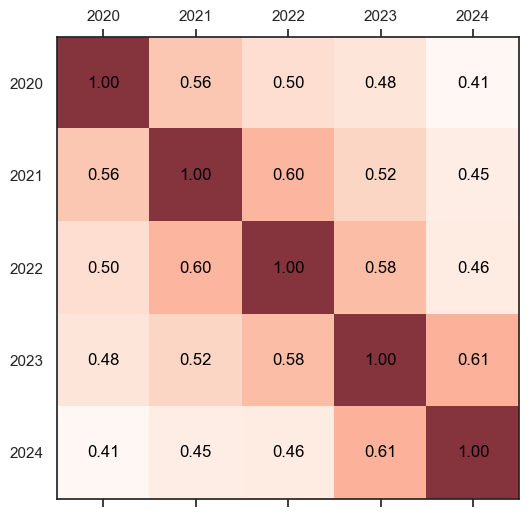

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de correlación de Spearman entre años
data = np.array([
    [1.000000, 0.559358, 0.501883, 0.483403, 0.408782],
    [0.559358, 1.000000, 0.600291, 0.523664, 0.450658],
    [0.501883, 0.600291, 1.000000, 0.581167, 0.460194],
    [0.483403, 0.523664, 0.581167, 1.000000, 0.606641],
    [0.408782, 0.450658, 0.460194, 0.606641, 1.000000]
])

# Etiquetas de los años
etiquetas = ['2020', '2021', '2022', '2023', '2024']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el heatmap manual
cax = ax.matshow(data, cmap="Reds", alpha=0.8)

# Añadir los números dentro de las casillas
for (i, j), val in np.ndenumerate(data):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Configurar los ticks y etiquetas de los años
ax.set_xticks(np.arange(len(etiquetas)))
ax.set_yticks(np.arange(len(etiquetas)))
ax.set_xticklabels(etiquetas)
ax.set_yticklabels(etiquetas)

# Quitar la barra de colores
cax.colorbar = None

# Ajustar el diseño
#plt.title('Matriz de Correlación de Spearman entre Años', fontsize=16)
#plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [42]:
#df_merged.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun.csv')
#df_pivot = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun.csv')

In [44]:
df = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun.csv')

# Lista de los años a procesar (2020 a 2024 en este caso)
years = [2020, 2021, 2022, 2023, 2024]

# Lista para almacenar los resultados de las 10 ciudades con más eventos por cada año
top_cities = []

# Loop sobre cada año para extraer el top 10
for year in years:
    # Crear una columna 'eventos' temporal con los valores de cada año
    df_year = df[['nommun', str(year), 'id_poligon', 'geometry']].copy()
    df_year.columns = ['nommun', 'eventos', 'id_poligon', 'geometry']  # Renombrar las columnas

    # Calcular el total de eventos del año
    total_eventos_year = df_year['eventos'].sum()

    # Añadir la columna de porcentaje
    df_year['porcentaje'] = (df_year['eventos'] / total_eventos_year) * 100

    # Filtrar las 10 ciudades con más eventos para el año actual
    top_10 = df_year.nlargest(10, 'eventos')

    # Agregar el año como columna para diferenciar los registros
    top_10['year'] = year

    # Añadir el resultado al listado
    top_cities.append(top_10)

# Concatenar todos los DataFrames en uno solo
df_top_cities = pd.concat(top_cities)

# Mostrar el DataFrame resultante
print(df_top_cities)


                        nommun  eventos id_poligon  \
404        Reynosa, Tamaulipas    13285     PG1233   
528         Tapachula, Chiapas     6260     PG1530   
385   Piedras Negras, Coahuila     4062     PG1081   
6           Acayucan, Veracruz     3704     PG1378   
521          Suchiate, Chiapas     3561     PG1529   
213         Hermosillo, Sonora     3474      PG497   
371          Palenque, Chiapas     3309     PG1572   
542         Tenosique, Tabasco     2950     PG1572   
595      Tuxtla Chico, Chiapas     2594     PG1529   
596  Tuxtla Gutierrez, Chiapas     1884     PG1493   
564   Tijuana, Baja California    29615      PG190   
231      Huimanguillo, Tabasco    18618     PG1456   
404        Reynosa, Tamaulipas    17304     PG1233   
528         Tapachula, Chiapas    16334     PG1530   
6           Acayucan, Veracruz    14530     PG1378   
213         Hermosillo, Sonora    13995      PG497   
542         Tenosique, Tabasco    10718     PG1572   
596  Tuxtla Gutierrez, Chiap

In [51]:
#df_top_cities

In [49]:
# Convertir la columna de geometría de texto (si es que está en texto) a objetos geométricos (POINT)
#df_top_cities['geometry'] = df_top_cities['geometry'].apply(wkt.loads)

# Crear un GeoDataFrame con la geometría correspondiente
#gdf_top_cities = gpd.GeoDataFrame(df_top_cities, geometry='geometry')

# Establecer el sistema de referencia de coordenadas (CRS), si es WGS 84 (EPSG:4326), lo más común para coordenadas geográficas
#gdf_top_cities.set_crs(epsg=4326, inplace=True)


In [9]:
gdf_top_cities = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\top10mun.shp')

In [12]:
# Filtrar los GeoDataFrames por cada año
gdf_2020 = gdf_top_cities[gdf_top_cities['year'] == 2020]
gdf_2021 = gdf_top_cities[gdf_top_cities['year'] == 2021]
gdf_2022 = gdf_top_cities[gdf_top_cities['year'] == 2022]
gdf_2023 = gdf_top_cities[gdf_top_cities['year'] == 2023]
gdf_2024 = gdf_top_cities[gdf_top_cities['year'] == 2024]

# Visualizar los primeros registros de cada GeoDataFrame para asegurarte de que estén correctos
print("Año 2020:")
display(gdf_2020.head())

print("Año 2021:")
display(gdf_2021.head())

print("Año 2022:")
display(gdf_2022.head())

print("Año 2023:")
display(gdf_2023.head())

print("Año 2024:")
display(gdf_2024.head())



Año 2020:


,nommun,eventos,id_poligon,porcentaje,year,geometry
0,"Reynosa, Tamaulipas",13285,PG1233,16.126683,2020,POINT (-98.27882 26.09077)
1,"Tapachula, Chiapas",6260,PG1530,7.599024,2020,POINT (-92.26093 14.90429)
2,"Piedras Negras, Coahuila",4062,PG1081,4.930868,2020,POINT (-100.51484 28.70417)
3,"Acayucan, Veracruz",3704,PG1378,4.496292,2020,POINT (-94.91458 17.94879)
4,"Suchiate, Chiapas",3561,PG1529,4.322704,2020,POINT (-92.24196 14.63217)


Año 2021:


,nommun,eventos,id_poligon,porcentaje,year,geometry
10,"Tijuana, Baja California",29615,PG190,9.562727,2021,POINT (-117.01953 32.53174)
11,"Huimanguillo, Tabasco",18618,PG1456,6.011779,2021,POINT (-93.66344 17.76210)
12,"Reynosa, Tamaulipas",17304,PG1233,5.587487,2021,POINT (-98.27882 26.09077)
13,"Tapachula, Chiapas",16334,PG1530,5.274273,2021,POINT (-92.26093 14.90429)
14,"Acayucan, Veracruz",14530,PG1378,4.691758,2021,POINT (-94.91458 17.94879)


Año 2022:


,nommun,eventos,id_poligon,porcentaje,year,geometry
20,"Tapachula, Chiapas",45672,PG1530,10.346867,2022,POINT (-92.26093 14.90429)
21,"Tijuana, Baja California",34723,PG190,7.866401,2022,POINT (-117.01953 32.53174)
22,"Suchiate, Chiapas",28889,PG1529,6.544724,2022,POINT (-92.24196 14.63217)
23,"Acayucan, Veracruz",27028,PG1378,6.123119,2022,POINT (-94.91458 17.94879)
24,"Hermosillo, Sonora",23080,PG497,5.228711,2022,POINT (-110.96922 29.09482)


Año 2023:


,nommun,eventos,id_poligon,porcentaje,year,geometry
30,"Huimanguillo, Tabasco",86684,PG1456,11.128928,2023,POINT (-93.66344 17.76210)
31,"Centro, Tabasco",74160,PG1495,9.521034,2023,POINT (-92.77479 18.02716)
32,"Tapachula, Chiapas",70665,PG1530,9.072328,2023,POINT (-92.26093 14.90429)
33,"Tenosique, Tabasco",39620,PG1572,5.086615,2023,POINT (-91.42202 17.47071)
34,"Acayucan, Veracruz",36446,PG1378,4.679121,2023,POINT (-94.91458 17.94879)


Año 2024:


,nommun,eventos,id_poligon,porcentaje,year,geometry
40,"Centro, Tabasco",107606,PG1495,15.108407,2024,POINT (-92.77479 18.02716)
41,"Tapachula, Chiapas",87845,PG1530,12.333866,2024,POINT (-92.26093 14.90429)
42,"Huimanguillo, Tabasco",64851,PG1456,9.105396,2024,POINT (-93.66344 17.76210)
43,"Macuspana, Tabasco",45254,PG1534,6.353882,2024,POINT (-92.59611 17.76092)
44,"Suchiate, Chiapas",32270,PG1529,4.530865,2024,POINT (-92.24196 14.63217)
